#Company Profile
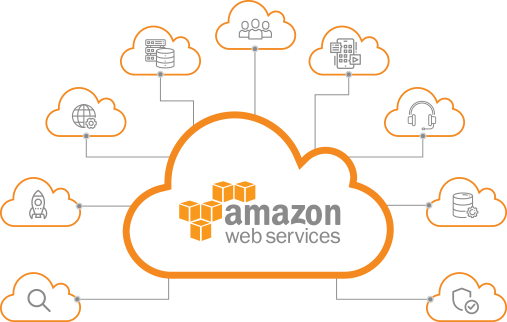

Amazon Web Services (AWS) adalah anak perusahaan Amazon yang menyediakan layanan komputasi awan sesuai permintaan kepada individu, perusahaan, dan pemerintah, menawarkan berbagai macam layanan infrastruktur, seperti daya komputasi, penyimpanan, jaringan, basis data, analitik, machine learning, kecerdasan buatan (AI), keamanan, dan banyak lagi, yang memungkinkan pengguna untuk membangun dan menjalankan berbagai aplikasi dan layanan di lingkungan yang fleksibel dan terukur.

#Stake Holder

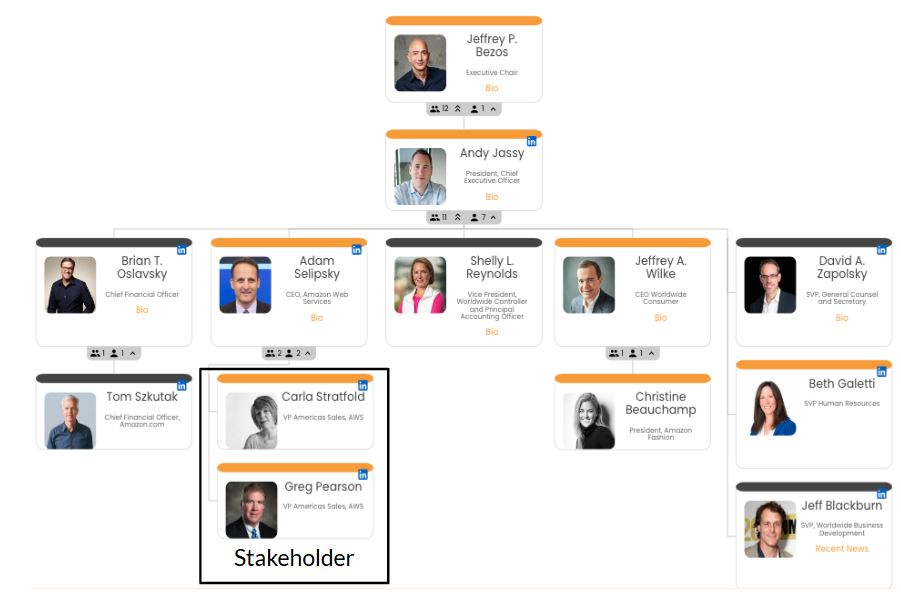

Target untuk stakehoder kali ini adalah vp American Sales

#Import Libraries

In [1]:
#import library used in working on capstone 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

#Understanding Dataset and Preprocessing Dataset

**Information About Dataset**

This dataset contains transaction data from SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a single transaction/order (9,994 transactions), and the columns include:

**Column Description**

| **Columns Name** | **Column Description**                                   |
| ---------------- | -------------------------------------------------------- |
| **Row ID**       | A unique identifier for each transaction.                |
| **Order ID**     | A unique identifier for each order.                      |
| **Order Date**   | The date when the order was placed.                      |
| **Date Key**     | A numerical representation of the order date (YYYYMMDD). |
| **Contact Name** | The name of the person who placed the order.             |
| **Country**      | The country where the order was placed.                  |
| **City**         | The city where the order was placed.                     |
| **Region**       | The region where the order was placed.                   |
| **Subregion**    | The subregion where the order was placed.                |
| **Customer**     | The name of the company that placed the order.           |
| **Customer ID**  | A unique identifier for each customer.                   |
| **Industry**     | The industry the customer belongs to.                    |
| **Segment**      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| **Product**      | The product was ordered.                                 |
| **License**      | The license key for the product                          |
| **Sales**        | The total sales amount for the transaction.              |
| **Quantity**     | The total number of items in the transaction             |
| **Discount**     | The discount applied to the transaction.                 |
| **Profit**       | The profit from the transaction.                         |


In [2]:
#connect to gdrive as a place to store the data used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv file and create dataframe from the data
#After the dataframe is created, the parsedate function is used so that the csv can read the 'Order Date' column as a column with the datetime64 data type.
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/Purwadhika/capstone 2/SaaS-Sales.csv',
parse_dates=['Order Date'])

In [4]:
#Displays summary information from the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

From the results of the check, it was obtained:
1. Shape dataset = (9994, 19)
2. There are no null values ​​in the dataset
3. There are 3 types of data in the dataset with further explanation according to the output code

In [5]:
#Check Duplicate from dataset
df.duplicated().sum()

np.int64(0)

From the results of checking this dataset, there is no duplicate data.

In [6]:
#Display 5 data from dataset
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [7]:
#rename columns that have spaces with the '_' symbol to make the data easier to process
df=df.rename(columns={'Row ID':'Row_ID','Order ID':'Order_ID','Order Date':'Order_Date','Date Key':'Date_Key','Contact Name':'Contact_Name','Customer ID':'Customer_ID'})

In [8]:
#check whether the column names in the data have changed or not
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Date_Key', 'Contact_Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer_ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [9]:
#Displays a summary of descriptive statistics of the data used.
df.describe()

,Row_ID,Order_Date,Date_Key,Customer_ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


In [10]:
#Displays the number of unique values ​​from each column in the database and displays the values
for i in df.columns:
  print(f'''
-------------------
{i}:
jumlah Unique Value = {len(df[i].unique())}

Unique Value :

{df[i].unique()}
-------------------''')


-------------------
Row_ID:
jumlah Unique Value = 9994

Unique Value :

[   1    2    3 ... 9992 9993 9994]
-------------------

-------------------
Order_ID:
jumlah Unique Value = 5009

Unique Value :

['EMEA-2022-152156' 'AMER-2022-138688' 'EMEA-2021-108966' ...
 'EMEA-2020-110422' 'AMER-2023-121258' 'AMER-2023-119914']
-------------------

-------------------
Order_Date:
jumlah Unique Value = 1237

Unique Value :

<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]
-------------------

-------------------
Date_Key:
ju

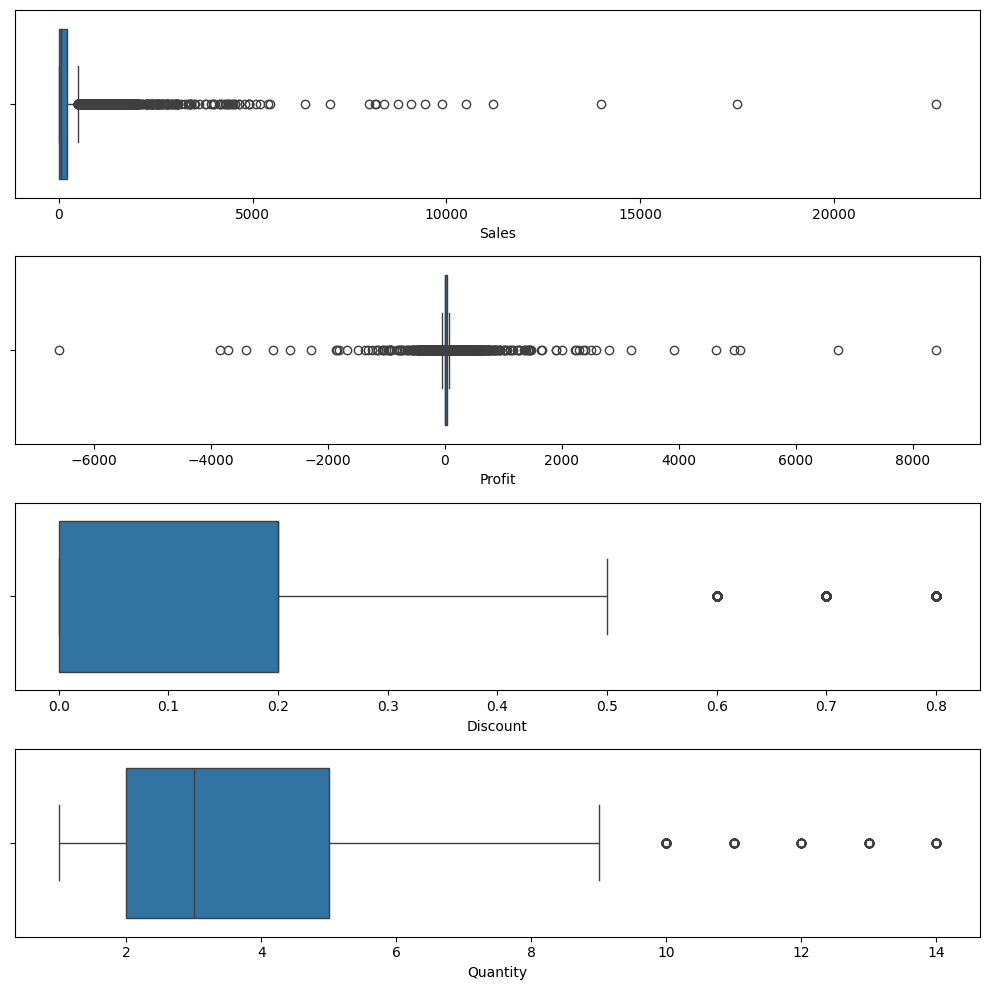

In [11]:
#Checking all outliers in 'Sales','Profit','Discount' and 'Quantity' columns using boxplot.
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(10, 10))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

From the visualization results, it turns out that there are quite a lot of outliers in the Sales and profit columns, while the discount and outlier columns have quite a few outliers. For more clarity, it will be checked further.

In [12]:
#We will analyze outliers further using the IQR method
outliers_list = []
l1 = []
l2 = []
l3 = []
for column in feature:
    # Calculate Q1, Q3, and IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
    # Calculate bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
  outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
  outliers = df[outliers_condition]
    # Store information in list
  l1.append(lower_bound),
  l2.append(upper_bound),
  l3.append(outliers_condition.sum())
df_outlier = pd.DataFrame({'Lower Bound':l1,'Upper Bound':l2,'sum of outlier':l3},index=feature)
df_outlier

,Lower Bound,Upper Bound,sum of outlier
Sales,-271.710000,498.930000,1167
Profit,-39.724125,70.816875,1881
Discount,-0.300000,0.500000,856
Quantity,-2.500000,9.500000,170


From the analysis that has been done, the Lower Bound, Upper Bound and Sum of outlier values ​​are obtained for the Sales, Profit, Discount and Quantity columns. In the capstone work, outliers will be left because they do not affect the results and data containing outliers tends to be needed.

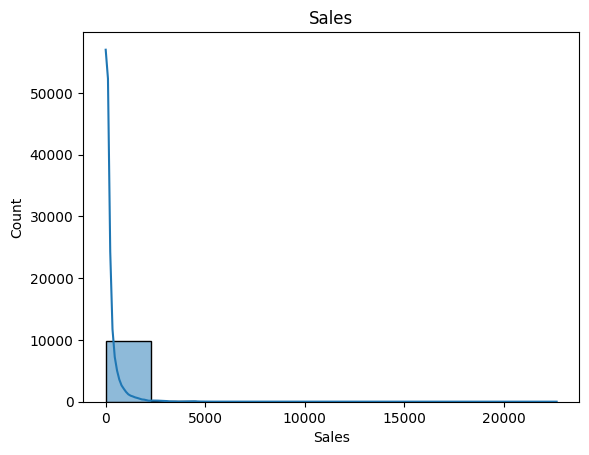

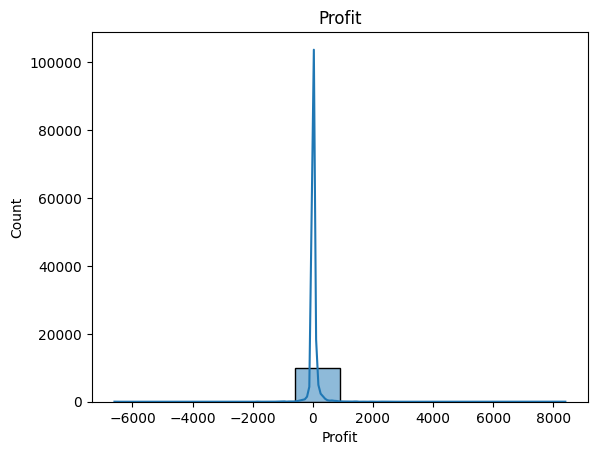

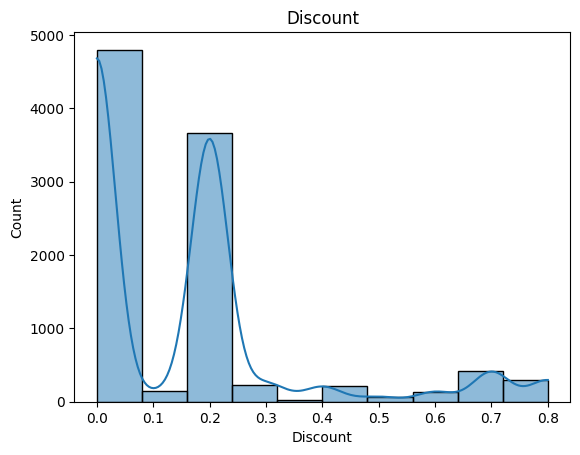

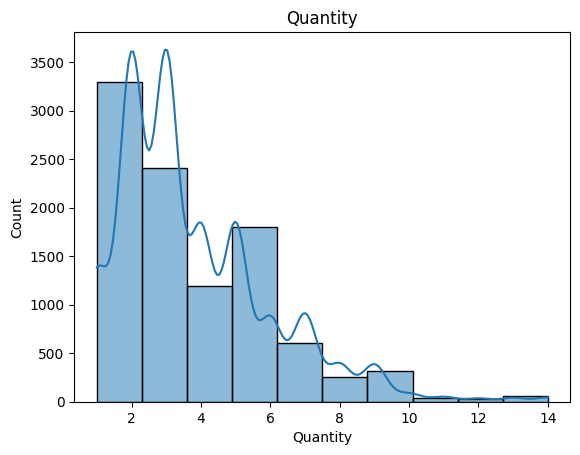

In [13]:
#Check Dataset Normality for Sales, Profit, Discount and Quantity data
for i in feature:
  sns.histplot(df[i], bins=10, kde=True)
  plt.title(i)
  plt.show()

From the analysis results, it can be concluded that there is no normally distributed data for the Sales, Profit, Discount and Quantity columns.

#LRFM Analysis

LRFM Analysis is a customer data analysis method used in marketing. LRFM stands for four key metrics used to assess customer value and potential:

* Latency: How long it has been since a customer’s last interaction or purchase.

* Recency: How recently a customer made a purchase or last interacted with your business.

* Frequency: How often a customer makes a purchase or interacts within a given time period.

* Monetary: How much money a customer spends on their purchases or interactions.

In [14]:
#specify the latest order date in the Order_Date column
analysis_date = df.Order_Date.max() + datetime.timedelta(1)
analysis_date

Timestamp('2024-01-01 00:00:00')

In [15]:
#Create a new data frame named dt_customer.
#Determine the length, recency, frequency and monetaryy values ​​of the df data and then save them into the df_customer data frame.
df_customer = df[df.Country=='United States'].groupby('Customer_ID').agg(
length=('Order_Date', lambda x: (analysis_date - x.min()).days),
recency=('Order_Date', lambda x: (analysis_date - x.max()).days),
frequency=('Order_ID', lambda x: x.nunique()),
monetary=('Sales', 'sum'))

df_customer.head()

,length,recency,frequency,monetary
Customer_ID,,,,
1001,1356,78,12,5509.444
1002,1353,37,20,7089.238
1003,1376,41,15,8752.882
1004,1448,14,17,12585.150
1005,1297,29,14,4614.641


The following is an explanation of each of the variables above:

| Variable | Description |
| --- | --- |
| customerID | ID customer|
| length | Customer age, obtained from the difference between the first day of transaction and the analysis day. |
| recency | The difference between the last transaction day and the analysis day |
| frequency | Number of transactions made by customers |
| monetary | The amount of expenditure made by the customer |

In [16]:
#
df_customer['l_score'] = pd.qcut(
    df_customer['length'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

df_customer.head()

,length,recency,frequency,monetary,l_score
Customer_ID,,,,,
1001,1356,78,12,5509.444,3
1002,1353,37,20,7089.238,3
1003,1376,41,15,8752.882,4
1004,1448,14,17,12585.150,4
1005,1297,29,14,4614.641,3


In [17]:
df_customer['r_score'] = pd.qcut(
    df_customer['recency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df_customer.head()

,length,recency,frequency,monetary,l_score,r_score
Customer_ID,,,,,,
1001,1356,78,12,5509.444,3,2
1002,1353,37,20,7089.238,3,3
1003,1376,41,15,8752.882,4,3
1004,1448,14,17,12585.150,4,4
1005,1297,29,14,4614.641,3,3


**Frequency Segmentation**

In [18]:
def f_score(x):
    if x==1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 5:
        return 3
    else:
        return 4

df_customer['f_score'] = df_customer['frequency'].apply(f_score)
df_customer.head()

,length,recency,frequency,monetary,l_score,r_score,f_score
Customer_ID,,,,,,,
1001,1356,78,12,5509.444,3,2,4
1002,1353,37,20,7089.238,3,3,4
1003,1376,41,15,8752.882,4,3,4
1004,1448,14,17,12585.150,4,4,4
1005,1297,29,14,4614.641,3,3,4


**Monetary Segmentation**

In [19]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],            # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_customer.head()


,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
Customer_ID,,,,,,,,
1001,1356,78,12,5509.444,3,2,4,3
1002,1353,37,20,7089.238,3,3,4,4
1003,1376,41,15,8752.882,4,3,4,4
1004,1448,14,17,12585.150,4,4,4,4
1005,1297,29,14,4614.641,3,3,4,3


3. labelling segment

a. Total Score Approach

In [20]:
df_customer['lrfm_score_total'] = df_customer['l_score'] + df_customer['r_score'] + df_customer['f_score'] + df_customer['m_score']
df_customer.head()

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total
Customer_ID,,,,,,,,,
1001,1356,78,12,5509.444,3,2,4,3,12
1002,1353,37,20,7089.238,3,3,4,4,14
1003,1376,41,15,8752.882,4,3,4,4,15
1004,1448,14,17,12585.150,4,4,4,4,16
1005,1297,29,14,4614.641,3,3,4,3,13


b. Combining Individual Scores Approach

In [21]:
df_customer['lrfm_score_combined'] = df_customer['l_score'].astype(str) + df_customer['r_score'].astype(str) + df_customer['f_score'].astype(str) + df_customer['m_score'].astype(str)
df_customer.head()

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_score_combined
Customer_ID,,,,,,,,,,
1001,1356,78,12,5509.444,3,2,4,3,12,3243
1002,1353,37,20,7089.238,3,3,4,4,14,3344
1003,1376,41,15,8752.882,4,3,4,4,15,4344
1004,1448,14,17,12585.150,4,4,4,4,16,4444
1005,1297,29,14,4614.641,3,3,4,3,13,3343


In [22]:
seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'New Cust Low Value',
    r'[1-2][1-4][1-4][3-4]': 'New Cust High Value',
    r'[3-4][1-2][1-2][1-2]': 'Old Cust Inactive',
    r'[3-4][1-2][1-4][1-4]': 'At Risk',
    r'[3-4][1-2][3-4][3-4]': 'Need Attention',
    r'[3-4][3-4][3-4][3-4]': 'Loyal Cust',
    r'[3-4][3-4][3-4][1-2]': 'Potensial Loyal Cust',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Old Cust'
}

df_customer['lrfm_segment_combined'] = df_customer['lrfm_score_combined'].replace(seg_map, regex=True)
df_customer.head()

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_score_combined,lrfm_segment_combined
Customer_ID,,,,,,,,,,,
1001,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk
1002,1353,37,20,7089.238,3,3,4,4,14,3344,Loyal Cust
1003,1376,41,15,8752.882,4,3,4,4,15,4344,Loyal Cust
1004,1448,14,17,12585.150,4,4,4,4,16,4444,Loyal Cust
1005,1297,29,14,4614.641,3,3,4,3,13,3343,Loyal Cust


In [23]:
df_with_lrfm = pd.merge(df[df.Country=='United States'], df_customer, on='Customer_ID', how='outer')

In [24]:
pd.options.display.max_columns = 100

In [25]:
df_with_lrfm.head(1)

,Row_ID,Order_ID,Order_Date,Date_Key,Contact_Name,Country,City,Region,Subregion,Customer,Customer_ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_score_combined,lrfm_segment_combined
0,1909,AMER-2021-157959,2021-02-03,20210203,Joseph White,United States,New York City,AMER,NAMER,Abbott Laboratories,1001,Healthcare,Strategic,SaaS Connector Pack,IZG42HVFUA,136.92,4,0.0,41.076,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk


#Customer live time value analysis

CLV Analysis stands for Customer Lifetime Value Analysis. It is an important method in business that is used to predict the total revenue a company can expect from a customer over the entirety of their relationship with the business.

In [26]:
analysis_date = df_with_lrfm['Order_Date'].max()
customer_lifespan = df_with_lrfm.groupby('Customer_ID')['Order_Date'].min()
customer_lifespan = (analysis_date - customer_lifespan).dt.days
customer_lifespan = customer_lifespan.reset_index(name='Customer_Lifespan')
df_with_lrfm_test1 = pd.merge(df_with_lrfm, customer_lifespan, on='Customer_ID')

In [27]:
grouped_data = df_with_lrfm_test1.groupby(['Customer_ID', 'Order_Date'])['Sales'].sum()
total_sales_per_customer = grouped_data.groupby('Customer_ID').sum().reset_index(name='Total_Sales')
df_with_lrfm_test1 = pd.merge(df_with_lrfm_test1, total_sales_per_customer, on='Customer_ID', how='left')

In [28]:
df_with_lrfm_test1['ClV_Score'] = df_with_lrfm_test1.Total_Sales-df_with_lrfm_test1.Customer_Lifespan

In [29]:
display(df_with_lrfm_test1['ClV_Score'].quantile([0,0.25,0.5,0.75,1]))


df_with_lrfm_test1['CLV_Score(Qurtile)'] = pd.qcut(
    df_with_lrfm_test1['ClV_Score'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

df_with_lrfm_test1.head()

,ClV_Score
0.00,-744.750
0.25,1758.532
0.50,3968.496
0.75,6411.898
1.00,12750.618


,Row_ID,Order_ID,Order_Date,Date_Key,Contact_Name,Country,City,Region,Subregion,Customer,Customer_ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_score_combined,lrfm_segment_combined,Customer_Lifespan,Total_Sales,ClV_Score,CLV_Score(Qurtile)
0,1909,AMER-2021-157959,2021-02-03,20210203,Joseph White,United States,New York City,AMER,NAMER,Abbott Laboratories,1001,Healthcare,Strategic,SaaS Connector Pack,IZG42HVFUA,136.920,4,0.0,41.0760,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
1,2017,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,ContactMatcher,PRGMS3LWF9,17.568,2,0.2,6.3684,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
2,2018,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,FinanceHub,E7EWXSXD4J,14.620,2,0.0,6.8714,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
3,2019,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,Support,IBM0YECEXX,33.360,4,0.0,8.6736,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
4,2020,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,Support,NRAIT53A2T,40.140,6,0.0,19.6686,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3


In [30]:
df_with_lrfm_test1

,Row_ID,Order_ID,Order_Date,Date_Key,Contact_Name,Country,City,Region,Subregion,Customer,Customer_ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_score_combined,lrfm_segment_combined,Customer_Lifespan,Total_Sales,ClV_Score,CLV_Score(Qurtile)
0,1909,AMER-2021-157959,2021-02-03,20210203,Joseph White,United States,New York City,AMER,NAMER,Abbott Laboratories,1001,Healthcare,Strategic,SaaS Connector Pack,IZG42HVFUA,136.920,4,0.0,41.0760,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
1,2017,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,ContactMatcher,PRGMS3LWF9,17.568,2,0.2,6.3684,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
2,2018,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,FinanceHub,E7EWXSXD4J,14.620,2,0.0,6.8714,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
3,2019,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,Support,IBM0YECEXX,33.360,4,0.0,8.6736,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
4,2020,AMER-2021-113110,2021-03-19,20210319,Colin Hamilton,United States,Anaheim,AMER,NAMER,Abbott Laboratories,1001,Healthcare,SMB,Support,NRAIT53A2T,40.140,6,0.0,19.6686,1356,78,12,5509.444,3,2,4,3,12,3243,At Risk,1355,5509.444,4154.444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,9907,AMER-2021-129007,2021-09-13,20210913,Irene Lambert,United States,San Francisco,AMER,NAMER,Banco Santander,1101,Finance,Strategic,ContactMatcher,E988KN4FJ9,25.032,3,0.2,7.8225,1335,40,9,3405.080,3,3,4,2,12,3342,Potensial Loyal Cust,1334,3405.080,2071.080,2
1997,9908,AMER-2021-129007,2021-09-13,20210913,Irene Lambert,United States,San Francisco,AMER,NAMER,Banco Santander,1101,Finance,Strategic,FinanceHub,BF1A9H71L5,717.720,3,0.2,71.7720,1335,40,9,3405.080,3,3,4,2,12,3342,Potensial Loyal Cust,1334,3405.080,2071.080,2
1998,9909,AMER-2021-129007,2021-09-13,20210913,Irene Lambert,United States,San Francisco,AMER,NAMER,Banco Santander,1101,Finance,Strategic,SaaS Connector Pack,LXULGRNB0O,207.350,5,0.0,24.8820,1335,40,9,3405.080,3,3,4,2,12,3342,Potensial Loyal Cust,1334,3405.080,2071.080,2
1999,9910,AMER-2021-129007,2021-09-13,20210913,Irene Lambert,United States,San Francisco,AMER,NAMER,Banco Santander,1101,Finance,Strategic,SaaS Connector Pack,WGGGZ2ELS4,44.670,3,0.0,12.0609,1335,40,9,3405.080,3,3,4,2,12,3342,Potensial Loyal Cust,1334,3405.080,2071.080,2


#Kohort Analysis

Cohort Analysis is a data analysis method used to understand the behavior of a group of individuals (called a cohort) over time. This group of individuals, or cohort, is grouped together based on shared characteristics or experiences that occur over a period of time.

Rather than analyzing all users or customers as one big unit, Cohort Analysis breaks the data down into smaller groups and then tracks how each group behaves over time. This helps us see trends, patterns, and changes in behavior that might be hidden if we only looked at aggregate data.

In [31]:
df_with_lrfm_test1['Order_Year'] = df_with_lrfm_test1['Order_Date'].dt.year
first_order_year = df_with_lrfm_test1.groupby('Customer_ID')['Order_Year'].min().reset_index()
first_order_year = first_order_year.rename(columns={'Order_Year': 'Cohort'})
df_kohort = pd.merge(df_with_lrfm_test1, first_order_year, on='Customer_ID')


In [32]:
df_kohort['Cohort_Period'] = df_kohort['Order_Year'] - df_kohort['Cohort']

#Problem statement:
Analisi velue dan perkembangan setiap customer amazone web serfice di amerika dan juga cara untuk meningkatkan value dari customer

#1. Number of customers for each LRFM segment in the United States

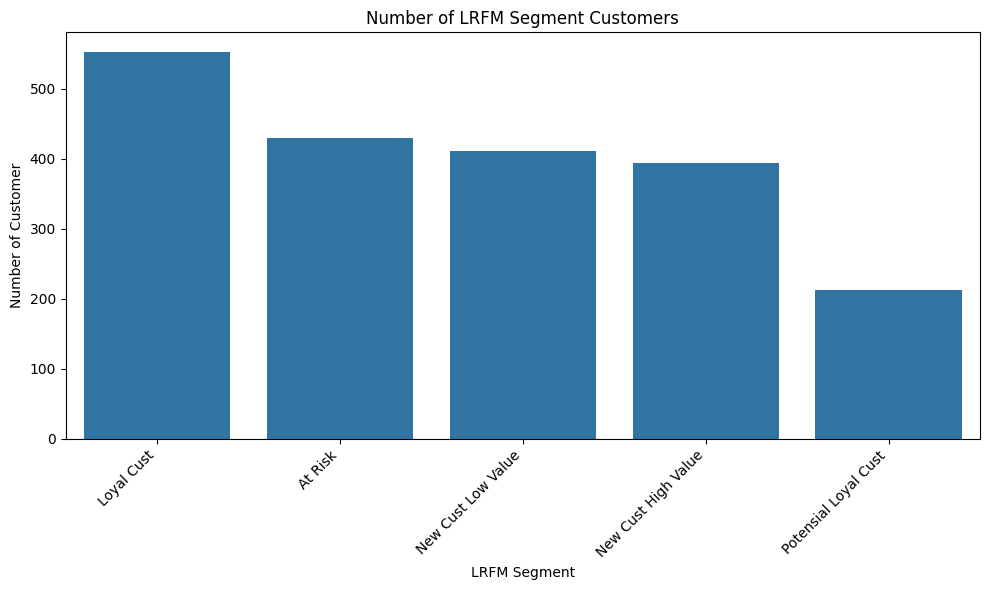

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_kohort, x='lrfm_segment_combined', order=df_kohort['lrfm_segment_combined'].value_counts().index)
plt.title('Number of LRFM Segment Customers')
plt.xlabel('LRFM Segment')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This is the insight gained from the graph above :

* Loyal customers are the most: The "Loyal Cust" category has the largest number of customers, which is more than 500 people. This shows that this business has a strong loyal customer base, which is a valuable asset.

* Attention needs to be paid to "At Risk" customers. There are a large number of customers who fall into the "At Risk" category. "At Risk" customers need to be retained so that they are not lost.

#2. Customer Retention Base on Kohort

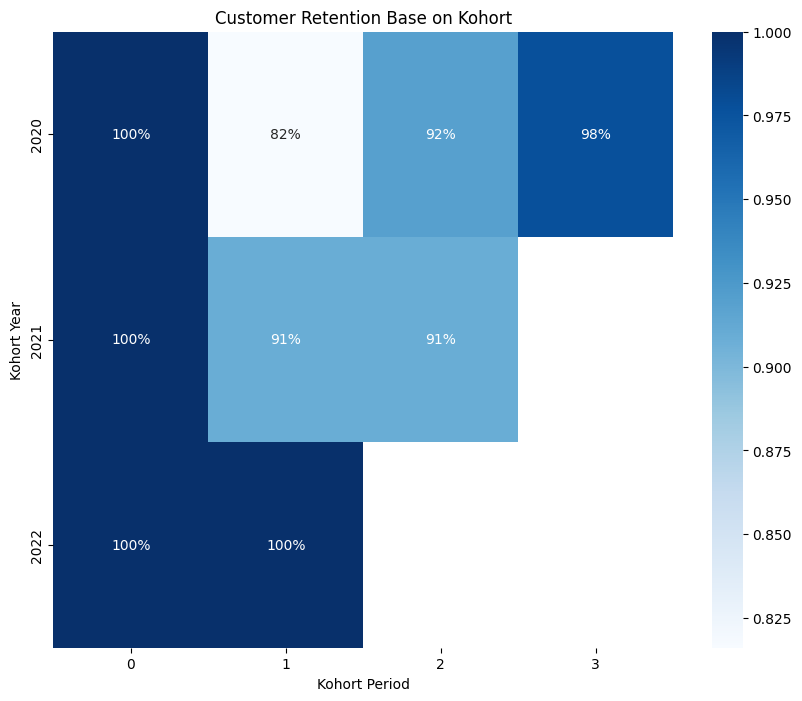

In [34]:
kohort_counts = df_kohort.groupby(['Cohort', 'Cohort_Period'])['Customer_ID'].nunique().reset_index(name='Customer_Count')
kohort_pivot = kohort_counts.pivot_table(index='Cohort', columns='Cohort_Period', values='Customer_Count')
cohort_sizes = kohort_pivot.iloc[:,0]
retention_matrix = kohort_pivot.divide(cohort_sizes, axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention Base on Kohort')
plt.xlabel('Kohort Period')
plt.ylabel('Kohort Year')
plt.show()

This is the insight gained from the graph above :
* Very Strong Early Customer Retention: Each cohort (a group of customers who joined in the same year) started with 100% retention in Cohort Period 0, which is reasonable since this is their initial period. More importantly, retention in Cohort Period 1 (after one period) was also quite high, above 80% for all years (82% for 2020, 91% for 2021, and 100% for 2022). This suggests that a large portion of customers are sticking around after the initial period.

* Long-Term Retention Challenges Seen in Early Cohorts: While early retention was strong, there was a slight decline in older cohorts. For example, the 2020 cohort, which started at 100% in period 0, dropped to 82% in period 1, 92% in period 2, and 98% in period 3 (although there was a slight rebound in periods 2 and 3, possibly due to calculation methodology or reactivation). This suggests that retaining customers over a very long period of time (more than one or two periods) may require a different, more appropriate strategy.

#3. CLV Analysis for LRFM Segment

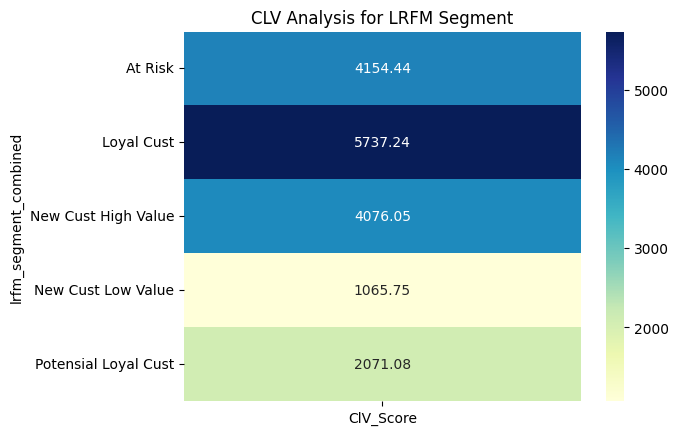

In [35]:
lrfm_heatmap = df_kohort.pivot_table(index='lrfm_segment_combined', values=['ClV_Score'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('CLV Analysis for LRFM Segment')
plt.show()#semakin gelap semakin butuh di dahulukan

This is the insight gained from the graph above :
* Loyal Customers are a Company's Treasure: The "Loyal Cust" segment has the highest CLV significantly, at around 5737. This means that these loyal customers are expected to generate the most revenue for the company throughout their lifetime as customers. They are the most stable and valuable source of revenue.

* "At Risk" Customers Are Also Very Valuable: Although not as high as loyal customers, the "At Risk" segment (around 4154) has a very substantial CLV. This shows that customers who are at risk of leaving still have great revenue potential, so efforts to retain them are very important.

#4. Improve clv score base on discount

Corelation Check

In [36]:
correlation = df_kohort['Discount'].corr(df_kohort[df_kohort.lrfm_segment_combined == 'At Risk']['recency'])
correlation

np.float64(0.014984588044831654)

In [42]:
df_kohort[['Product','Discount','Profit']][df_kohort.Profit>0].sort_values(by=['Product','Discount','Profit'],ascending=[True,False,False]).groupby('Product').head(1)

,Product,Discount,Profit
580,Alchemy,0.20,1049.9850
963,Big Ol Database,0.20,503.6400
1969,ChatBot Plugin,0.00,111.8240
1479,ContactMatcher,0.20,1906.4850
122,Data Smasher,0.00,659.9800
491,FinanceHub,0.20,267.6672
1808,Marketing Suite,0.15,225.7350
1879,Marketing Suite - Gold,0.00,334.1142
17,OneView,0.00,654.7554
1759,SaaS Connector Pack,0.00,297.6900


In [43]:
df_kohort[['Product','Discount','Profit']][df_kohort.Profit>0].sort_values(by=['Product','Discount','Profit'],ascending=[True,True,True]).groupby('Product').head(1)

,Product,Discount,Profit
471,Alchemy,0.20,59.9980
769,Big Ol Database,0.20,24.2919
1587,ChatBot Plugin,0.00,0.5967
186,ContactMatcher,0.20,0.5040
753,Data Smasher,0.00,0.4356
874,FinanceHub,0.00,1.4112
924,Marketing Suite,0.15,3.4196
480,Marketing Suite - Gold,0.00,0.2034
528,OneView,0.00,2.0228
691,SaaS Connector Pack,0.00,1.1136


In [39]:
df_kohort[['Product','Discount','Profit']][df_kohort.Order_Date.dt.year==2023][df_kohort.Profit>0].sort_values(by=['Product','Discount','Profit'],ascending=[True,True,False])

<ipython-input-39-9cad6f27067e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_kohort[['Product','Discount','Profit']][df_kohort.Order_Date.dt.year==2023][df_kohort.Profit>0].sort_values(by=['Product','Discount','Profit'],ascending=[True,True,False])


,Product,Discount,Profit
580,Alchemy,0.2,1049.9850
1290,Alchemy,0.2,1007.9832
565,Alchemy,0.2,839.9860
91,Alchemy,0.2,434.9913
198,Alchemy,0.2,329.9940
...,...,...,...
1165,Support,0.0,3.7100
111,Support,0.0,3.6348
1389,Support,0.0,3.5010
559,Support,0.0,2.2282



* Dengan uji statistik diperoleh bahwa memberikan
diskon pada konsumen akan meningkatkan value konsumen.
* Tidak semua barang dapat diberikan diskon karena akan mempengaruhi profit perusahaan
* Berikut ini adalah besaran diskon yang dapat diberikan sesuai dengan product:


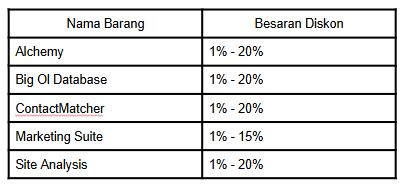

#5. Improve CLV score base on product recomendation

In [44]:
for i in df_kohort.Industry.unique():
  # Filter data untuk industry Healthcare
  df_healthcare = df_kohort[df_kohort['Industry'] == i]

  # Hitung jumlah pembelian untuk setiap produk di industry Healthcare
  product_counts_healthcare = df_healthcare['Product'].value_counts()

  # Ambil 5 produk yang paling banyak dibeli
  top_5_products_healthcare = product_counts_healthcare.head(5)

  print(f"5 Product yang paling banyak dibeli untuk Industry {i}:")
  print(top_5_products_healthcare)

5 Product yang paling banyak dibeli untuk Industry Healthcare:
Product
ContactMatcher            48
Support                   35
FinanceHub                33
SaaS Connector Pack       25
Marketing Suite - Gold    21
Name: count, dtype: int64
5 Product yang paling banyak dibeli untuk Industry Finance:
Product
Support                   75
ContactMatcher            60
FinanceHub                50
Marketing Suite - Gold    39
SaaS Connector Pack       37
Name: count, dtype: int64
5 Product yang paling banyak dibeli untuk Industry Tech:
Product
ContactMatcher            54
Support                   47
SaaS Connector Pack       28
Marketing Suite - Gold    28
Site Analytics            25
Name: count, dtype: int64
5 Product yang paling banyak dibeli untuk Industry Manufacturing:
Product
Support                38
ContactMatcher         35
SaaS Connector Pack    24
FinanceHub             23
Site Analytics         18
Name: count, dtype: int64
5 Product yang paling banyak dibeli untuk Industry Co

* prodak yang akan kita berikan pada konsumen adalah prodak yang paling sering dibeli sesaui dengan jenis industry konsumen
* berikut ini adalah tabel nama konsumen dan prodak yang dapat kita rekomen dasikan



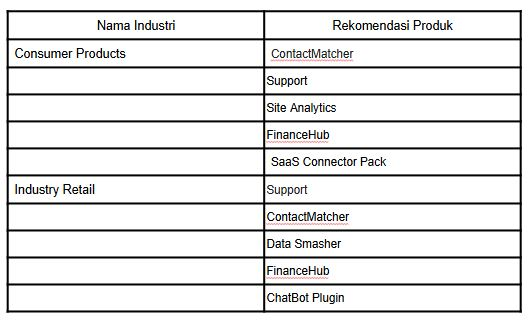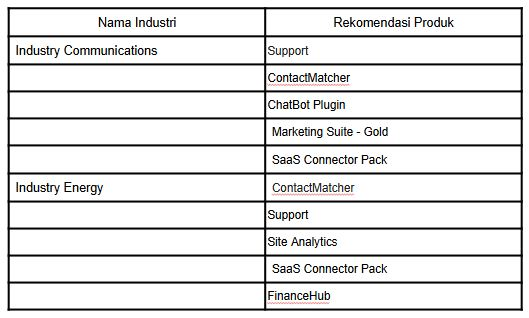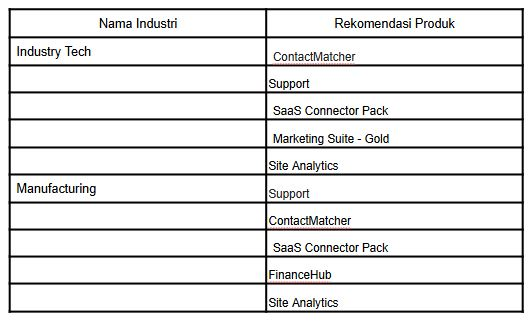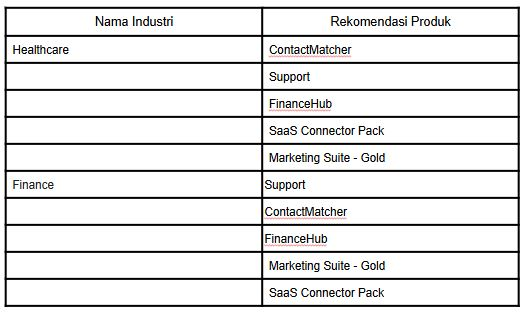

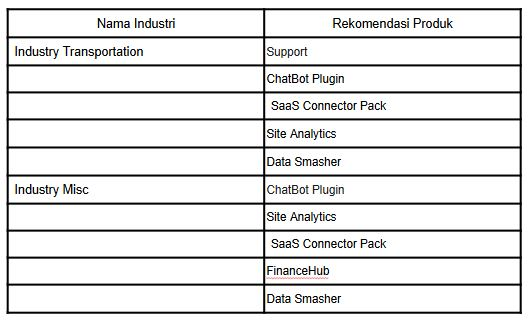

#Analysis not included in capstone presentation 2

In [48]:
from google.colab import files

lrfm_heatmap.to_excel('df.xlsx')
files.download('df.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## test1

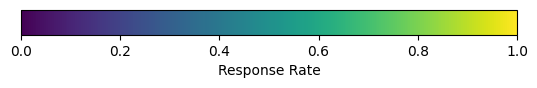

In [36]:
# Count
pivot_table = pd.pivot_table(df_kohort, values=['ClV_Score'], index=['CLV_Score(Qurtile)'],columns=['lrfm_segment_combined'], aggfunc=["mean"]).fillna(0).T
styled_table = pivot_table.style.background_gradient(cmap='viridis')

# Display the styled table
display(styled_table)

# Create a figure and axes for the colorbar
fig, ax = plt.subplots()

# Hide the axes (we only want the colorbar)
ax.set_visible(False)



# Create the colorbar
img = ax.imshow([[0, 1]], cmap='viridis')  # Use the same colormap as before
fig.colorbar(img, orientation='horizontal', label='Response Rate')

plt.show()

#Statistical Tests not shown in capstone presentation 2